In [2]:
from src.IO import load_NIST_data, load_transition_data, load_level_data, generate_full_from_dataframe
from src.render.grotrian import draw_levels
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from src import *
import src.lineshapes as lineshapes
from src.atom import Atom
import src.render.spectra as spectra
from pprint import pprint
import numpy as np

In [3]:
def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load_from_pickle=False):
    if load_from_pickle:
        a = Atom.load(f'atoms/{species}.atom')
    else:
        df = load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                         num_levels=num_levels,
                                         B=B,
                                         hf_csv=f'resources/{species}_Hyperfine.csv',
                                         transitions_df=trans_df,
                                         allowed=0b101)
        if save:
            a.save(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'resources/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [4]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [5]:
# whether to load from pickle
load_from_pickle = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 20
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load_from_pickle=load_from_pickle, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.22it/s]
adding level 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                                     
adding transition 4f14.5d 2D3/2 → 4f14.6p 2P*1/2                                                                       
adding internal transitions to 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                   

Generation complete


In [6]:
pprint(a.levels.list_names())

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2']


In [7]:
# pprint(a.transitions.list_names())

In [8]:
for l in a.levels.values():
    print(l, l.compute_gJ(), l.lande, l.compute_gJ()-l.lande)

4f14.6s 2S1/2 2.0023 1.998 0.0042999999999999705
4f13.(2F*).6s2 2F*7/2 1.1431857142857142 1.145 -0.0018142857142857682
4f13.(2F*).6s2 2F*5/2 0.8568142857142858 0.862 -0.005185714285714238
4f14.5d 2D3/2 0.79954 1.802 -1.0024600000000001
4f14.5d 2D5/2 1.20046 1.202 -0.0015399999999998748
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2 1.505553260959867 1.57 -0.0644467390401331
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2 2.26217667981098 1.44 0.8221766798109802
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 1.4045100462922009 1.32 0.08451004629220082
4f14.6p 2P*1/2 0.6658999999999999 0.667 -0.001100000000000101
4f14.6p 2P*3/2 1.3341 1.333 0.001100000000000101
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2 1.2814683472370527 0.935 0.34646834723705267
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2 1.567009640746582 1.112 0.455009640746582
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2 1.2313 1.23 0.0013000000000000789
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2 1.3033728698351752 1.331 -0.027627130164824765
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5

In [9]:
a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

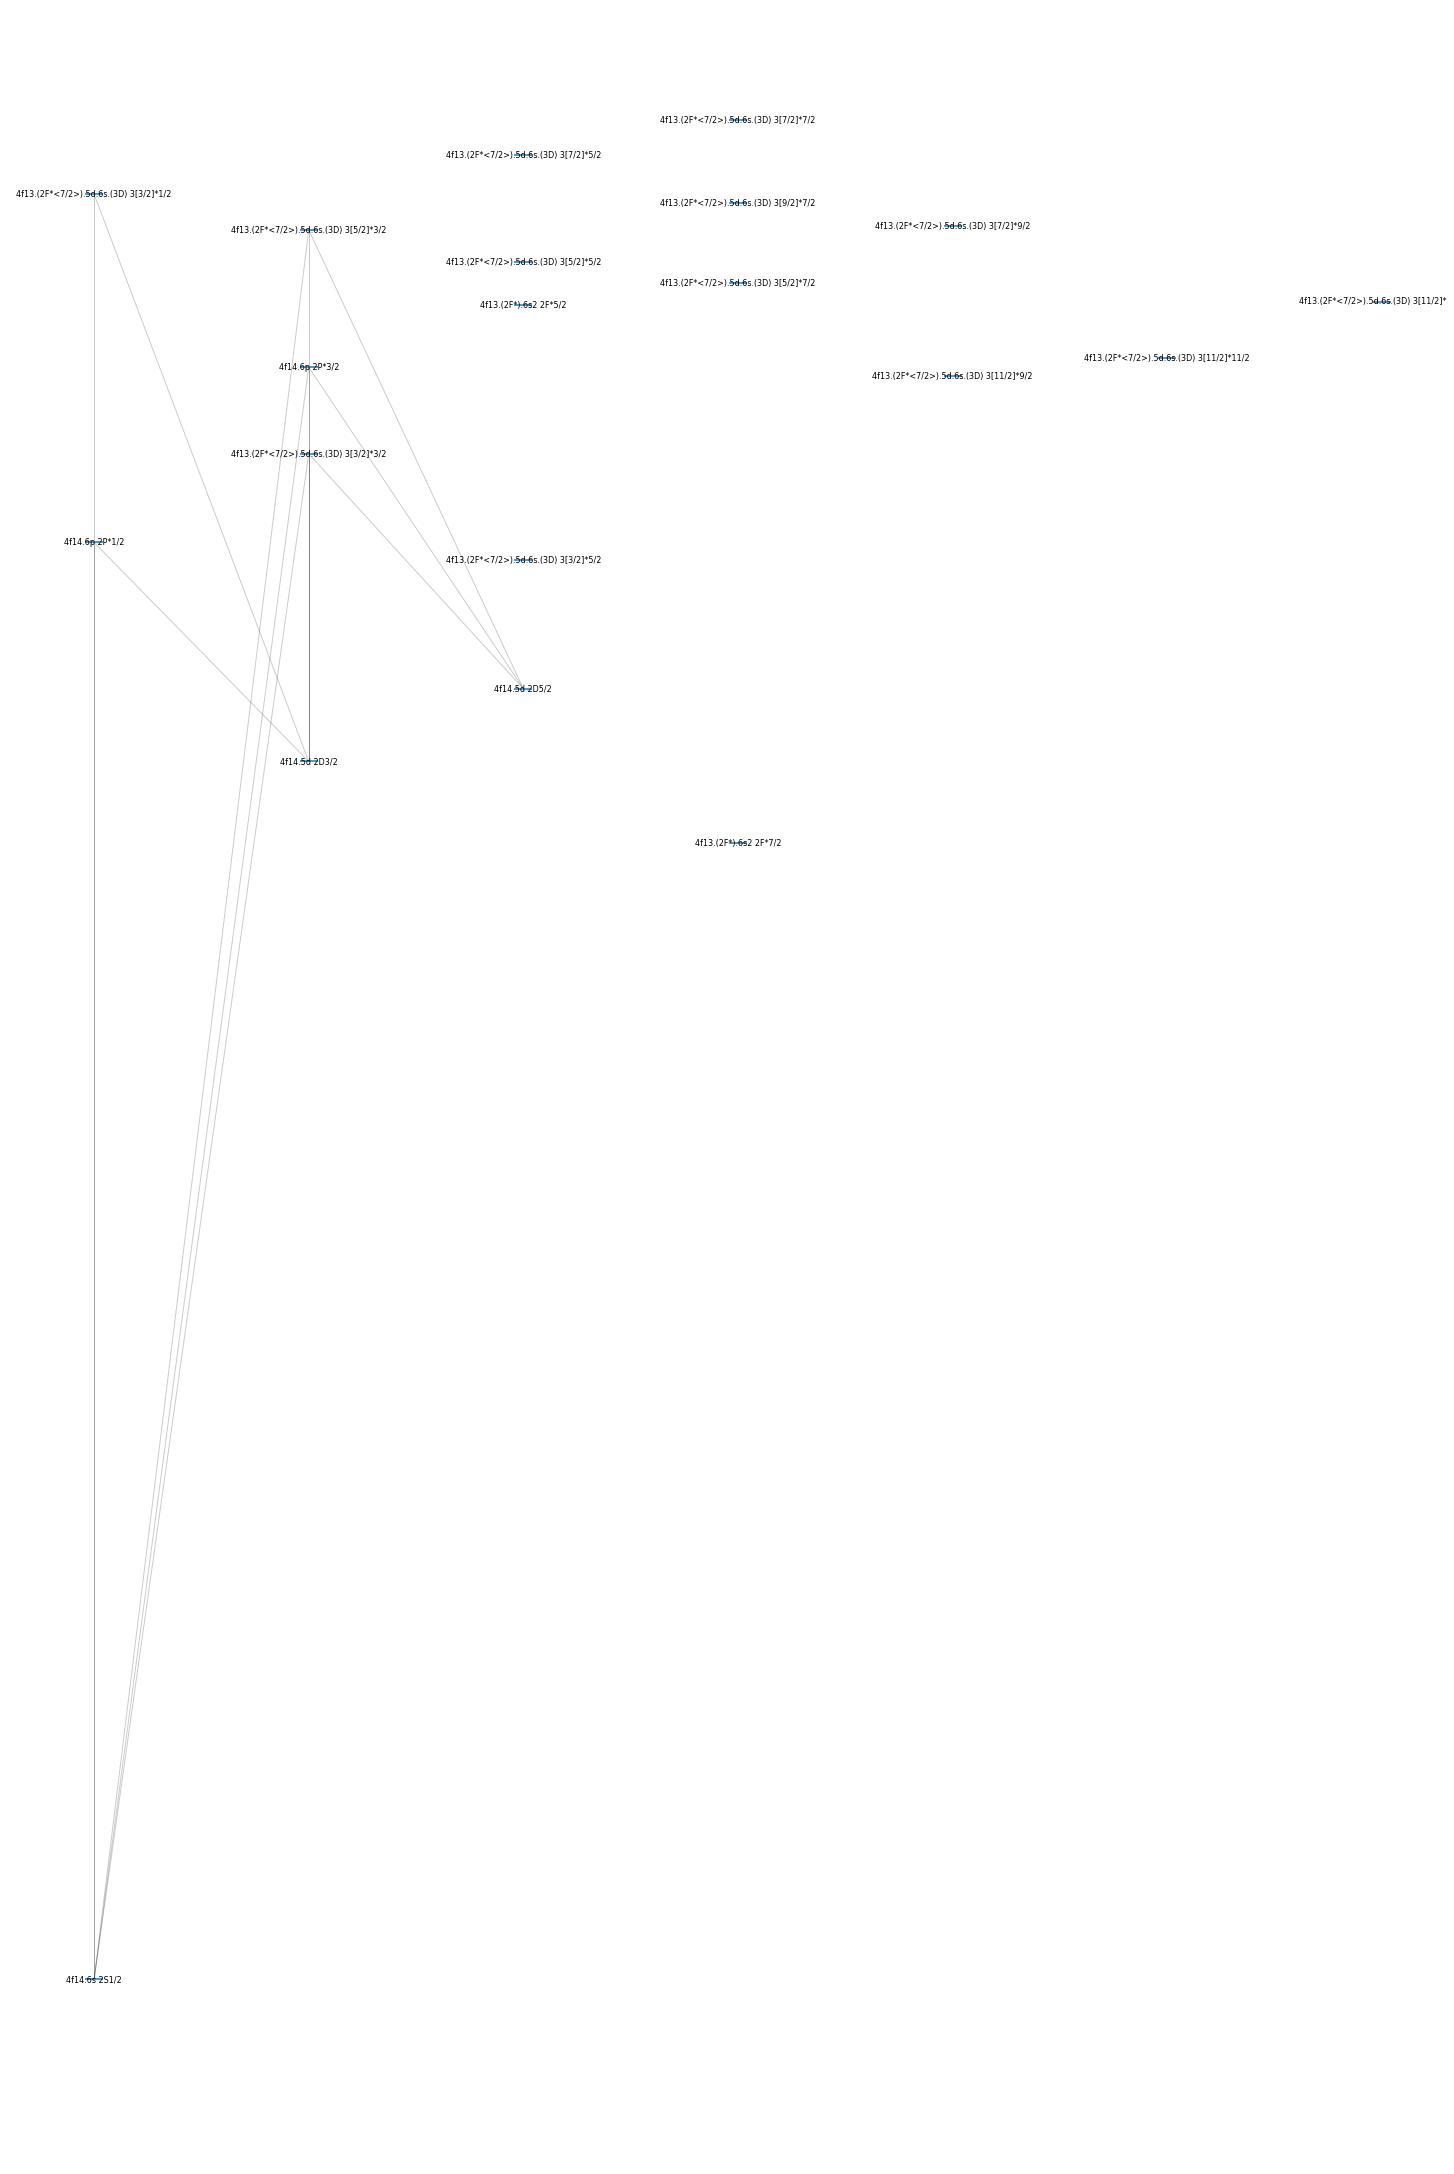

In [11]:
plt.figure(figsize=(20, 30))
draw_levels(a)

In [12]:
load_level_data('Yb II_level_data.csv', columns={'Configuration': 'Configuration', 
                                                 'Term': 'Term', 
                                                 'J': 'J', 
                                                 'Level (cm-1)':'Level (cm-1)', 
                                                 'Lande':'Lande', 
                                                 'Leading percentages': 'Leading percentages', 
                                                 'Level (Hz)':'Level (Hz)'})

,Configuration,Term,J,Level (cm-1),Lande,Leading percentages,Level (Hz)
0,4f14.6s,2S,1/2,0.0,1.998,100.0,0.0
1,4f13.(2F*).6s2,2F*,7/2,21418.75,1.145,98.0,642117970978750.0
2,4f13.(2F*).6s2,2F*,5/2,31568.08,0.862,90.0,946387229754064.0
3,4f14.5d,2D,3/2,22960.8,1.802,100.0,688347466964640.0
4,4f14.5d,2D,5/2,24332.69,1.202,100.0,729475694485202.0
...,...,...,...,...,...,...,...
328,NaN,*,11/2,96382.06,1.230,100.0,2889461467450348.0
329,NaN,*,9/2,96482.44,NaN,100.0,2892470784143752.0
330,NaN,*,11/2,96898.03,NaN,100.0,2904929858905774.0
331,NaN,*,13/2,97043.28,NaN,100.0,2909284344358224.0


In [4]:
a = {'q': 1, 'v': 2}
print([i for i in a.keys()])

['q', 'v']
